In [1]:
import pandas as pd
def fetch_train(name):
    filename = "./../Dataset/" + name + ".csv"
    df = pd.read_csv(filename)
    return df

In [3]:
train_1 = fetch_train("train_1").fillna(0)
train_2 = fetch_train("train_2").fillna(0)

In [4]:
y = train_1.loc[1][1:]
ind = pd.to_datetime(y.index)
arr = []
for i in range(len(y)):
    arr.append(y[i])
arr = pd.DataFrame(arr)
arr.index = ind

In [48]:
# split a univariate sequence into samples
import numpy as np
def split_sequence(sequence, n_steps):
    X, Y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X),np.array(Y)

In [49]:
train_X,train_Y = split_sequence(arr[0],30)

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [52]:
# define model
n_steps = 30
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [50]:
n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

In [54]:
# fit model
model.fit(train_X, train_Y, epochs=200, verbose=0)

In [56]:
Predicted_Model = model.predict(train_X, verbose=0)

In [60]:
from matplotlib import pyplot as plt

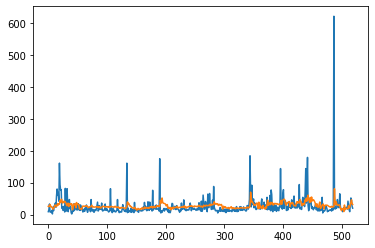

In [65]:
plt.plot(train_Y)
plt.plot(Predicted_Model)

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(train_Y,Predicted_Model))
print(rmse)

34.330500444733154
